In [1]:
import pandas as pd
df=pd.read_csv('Stores1b.csv')
df.head()

,Branch,City,Customer,Gender,Product line,Unit_price,Quantity,Tax,Total,Payment,cogs,Rating,Age,Quarterly_Tax,Price
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,9.1,23,210.0,7469
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,9.6,23,210.0,1528
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,7.4,24,NaN,4633
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,8.4,26,210.0,5822
4,A,Yangon,Normal,Male,Sports and travel,86.31,60,30.2085,634.3785,Ewallet,604.17,5.3,30,210.0,8631


In [2]:

df=pd.get_dummies(df,drop_first=True)
df.head()

,Unit_price,Quantity,Tax,Total,cogs,Rating,Age,Quarterly_Tax,Price,Branch_B,...,City_Yangon,Customer_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,548.9715,522.83,9.1,23,210.0,7469,False,...,True,False,False,False,False,True,False,False,False,True
1,15.28,5,3.8200,80.2200,76.40,9.6,23,210.0,1528,False,...,False,True,False,False,False,False,False,False,False,False
2,46.33,7,16.2155,340.5255,324.31,7.4,24,NaN,4633,False,...,True,True,True,False,False,False,True,False,True,False
3,58.22,8,23.2880,489.0480,465.76,8.4,26,210.0,5822,False,...,True,False,True,False,False,True,False,False,False,True
4,86.31,60,30.2085,634.3785,604.17,5.3,30,210.0,8631,False,...,True,True,True,False,False,False,False,True,False,True


In [3]:
#rows and Columns
df.shape

(51, 22)

In [4]:
#Categorical and numerical columns
cat=df.select_dtypes(include='object').columns
num=df.select_dtypes(include='number').columns
print(cat)
print(f"length:{len(cat)}")
print(num)
print(f"length:{len(num)}")

Index([], dtype='object')
length:0
Index(['Unit_price', 'Quantity', 'Tax', 'Total', 'cogs', 'Rating', 'Age',
       'Quarterly_Tax', 'Price'],
      dtype='object')
length:9


In [5]:
#Display the columns with null values
null=df.columns[df.isnull().any()]
print(null.tolist())

['Quarterly_Tax']


In [6]:
#Display the min,max and mode in numerical columns
num=df.select_dtypes(include='number').columns
for col in num:
    print(col)
    print(f"{df[col].min()}")
    print(f"Max:{df[col].max()}")
    print(f"Mode:{df[col].mode()[0]}")

Unit_price
14.48
Max:99.42
Mode:18.93
Quantity
1
Max:60
Mode:2
Tax
1.537
Max:39.48
Mode:5.679
Total
32.277
Max:829.08
Mode:119.259
cogs
30.74
Max:789.6
Mode:113.58
Rating
4.1
Max:9.9
Mode:4.5
Age
22
Max:32
Mode:22
Quarterly_Tax
19.0
Max:234.0
Mode:85.0
Price
1448
Max:9942
Mode:1893


                    min         25%        50%       75%      max
Unit_price       14.480    38.28000    62.6200    85.715    99.42
Quantity          1.000     3.50000     6.0000     8.000    60.00
Tax               1.537     6.93975    16.2155    23.829    39.48
Total            32.277   145.73475   340.5255   500.409   829.08
cogs             30.740   138.79500   324.3100   476.580   789.60
Rating            4.100     5.10000     7.0000     8.050     9.90
Age              22.000    23.00000    27.0000    29.000    32.00
Quarterly_Tax    19.000    85.00000    85.0000   210.000   234.00
Price          1448.000  3828.00000  6262.0000  8571.500  9942.00


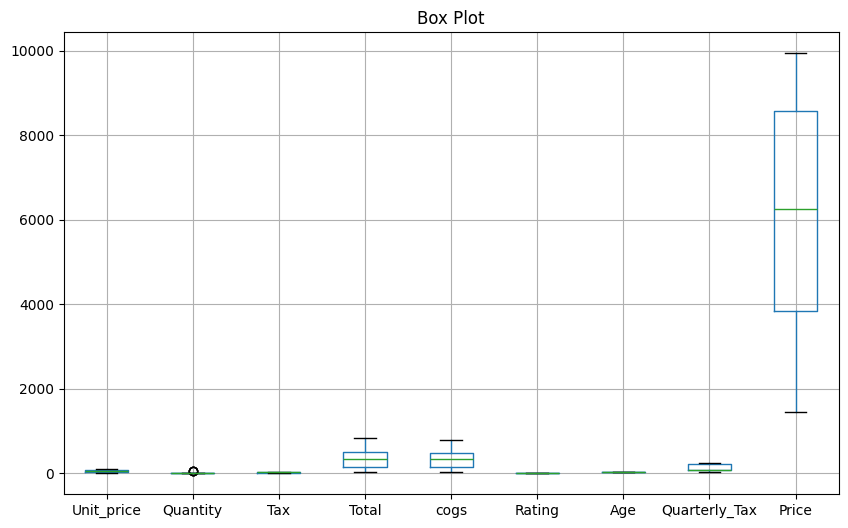

In [7]:
#Five number summary and correlate with boxplot
import matplotlib.pyplot as plt
num=df.select_dtypes(include='number').columns
five=df[num].describe().T[['min','25%','50%','75%','max']]
print(five)
df[num].boxplot(figsize=(10,6))
plt.title("Box Plot")
plt.show()

In [8]:
#Display the outlier values using Z Score
from scipy.stats import zscore
num=df.select_dtypes(include='number').columns
z_scores=df[num].apply(zscore)
outliers=(z_scores.abs()>3).any(axis=1)
print(df[outliers])

    Unit_price  Quantity      Tax     Total    cogs  Rating  Age  \
4        86.31        60  30.2085  634.3785  604.17     5.3   30   
21       87.98        55  13.1970  277.1370  263.94     5.1   29   
37       60.88        57  27.3960  575.3160  547.92     4.7   23   
47       20.01        56   9.0045  189.0945  180.09     4.1   22   

    Quarterly_Tax  Price  Branch_B  ...  City_Yangon  Customer_Normal  \
4           210.0   8631     False  ...         True             True   
21          100.0   8798     False  ...        False             True   
37           85.0   6088     False  ...         True             True   
47           85.0   2001      True  ...        False            False   

    Gender_Male  Product line_Fashion accessories  \
4          True                             False   
21         True                             False   
37        False                             False   
47        False                             False   

    Product line_Food and b

In [12]:
#Display the features with high postive correlation,high negative correlation and no correlation
num=df.select_dtypes(include='number').columns
correlation_matrix=df[num].corr()
high_positive=correlation_matrix[correlation_matrix>0.7].stack()
high_negative=correlation_matrix[correlation_matrix<-0.7].stack()
no_correlation=correlation_matrix[(correlation_matrix>-0.1)&(correlation_matrix<0.1)].stack()
print(f"Positive:{high_positive}")
print(f"Negative:{high_negative}")
print(f"No:{no_correlation}")

Positive:Unit_price     Unit_price       1.0
               Price            1.0
Quantity       Quantity         1.0
Tax            Tax              1.0
               Total            1.0
               cogs             1.0
Total          Tax              1.0
               Total            1.0
               cogs             1.0
cogs           Tax              1.0
               Total            1.0
               cogs             1.0
Rating         Rating           1.0
Age            Age              1.0
Quarterly_Tax  Quarterly_Tax    1.0
Price          Unit_price       1.0
               Price            1.0
dtype: float64
Negative:Series([], dtype: float64)
No:Unit_price     Quantity         0.050060
               Quarterly_Tax   -0.065439
Quantity       Unit_price       0.050060
               Age              0.028493
               Quarterly_Tax    0.022371
               Price            0.050060
Tax            Rating          -0.098140
Total          Rating          -0.0981

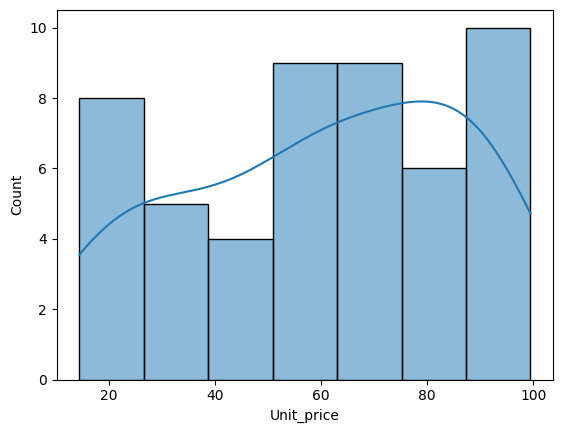

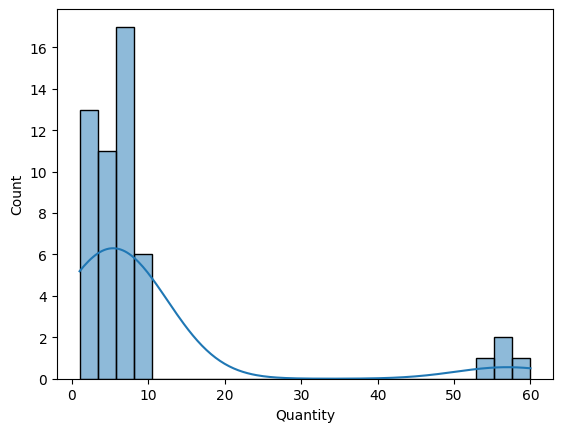

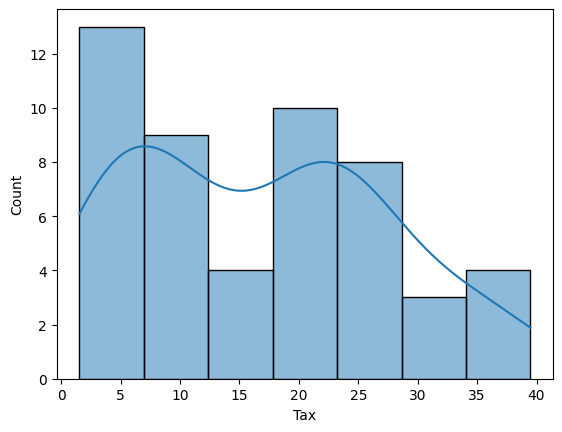

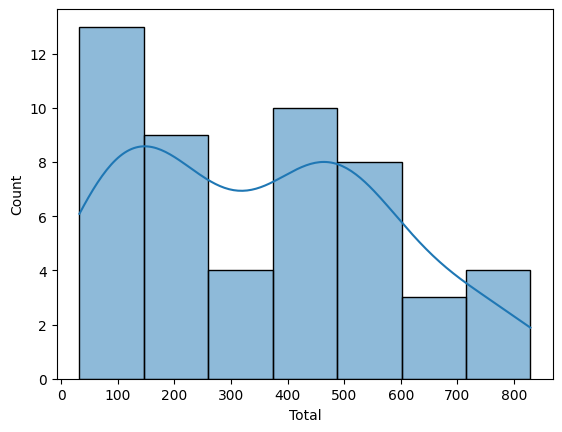

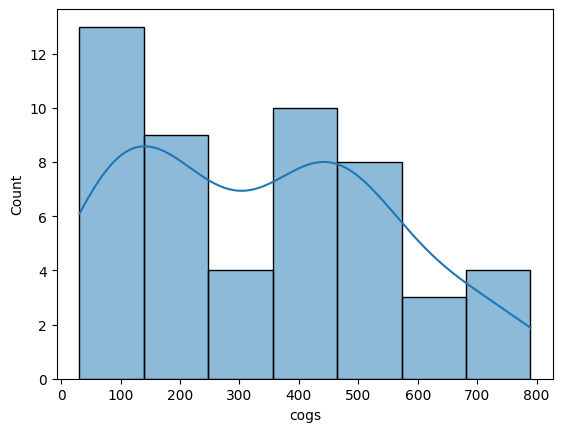

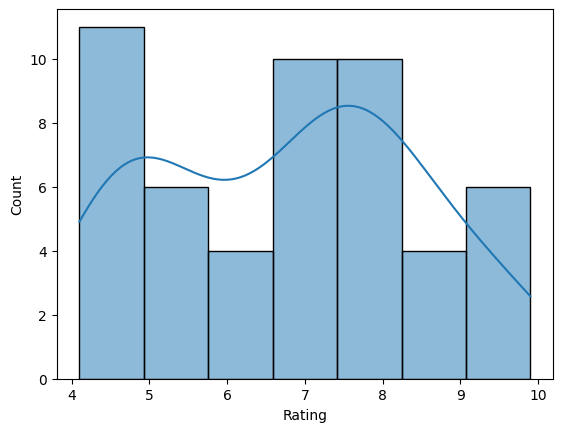

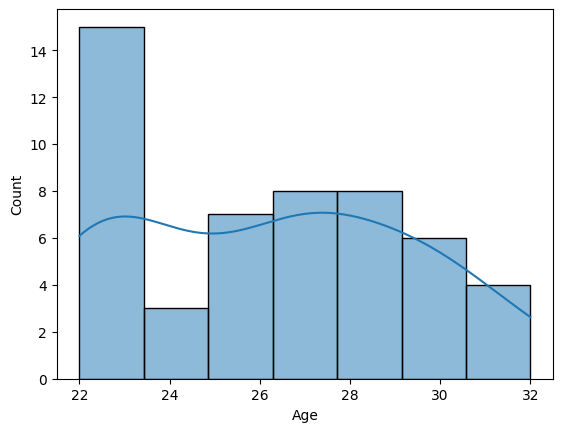

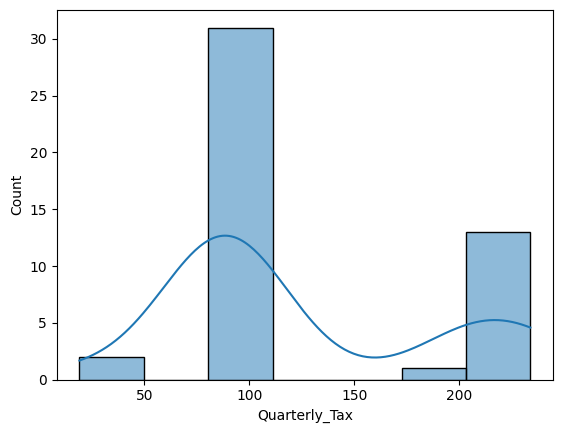

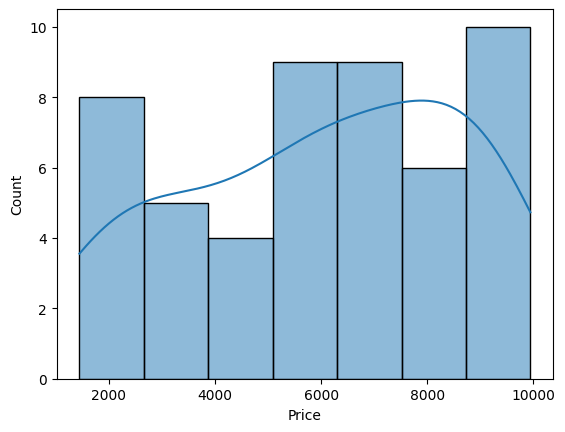

Right Skew:Quantity         3.058634
Tax              0.303518
Total            0.303518
cogs             0.303518
Rating           0.013950
Age              0.140968
Quarterly_Tax    0.728061
dtype: float64
Left Skew:Unit_price   -0.287378
Price        -0.287378
dtype: float64
No Skew:Series([], dtype: float64)


In [15]:
#Analyze the Skewness with plot distribution and display the features with right skew,left skew and no skew
import seaborn as sns
num=df.select_dtypes(include='number').columns
for col in num:
    sns.histplot(df[col],kde=True)
    plt.show()
skewness=df[num].skew()
print(f"Right Skew:{skewness[skewness>0]}")
print(f"Left Skew:{skewness[skewness<0]}")
print(f"No Skew:{skewness[skewness==0]}")


In [ ]:
#Perform univariate analysis for categorical variables using bar plot
cat=df.select_dtypes(include='object').columns
for col in cat:
    df[col].value_counts().plot(kind='bar')
    plt.show()